# Exercise 4: Linear Regression

In [1]:
# import standard libs
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Problem 1: Predicting SalePrice using GrLivArea
Import the complete dataset “train.csv” in Jupyter : houseData = pd.read_csv('train.csv')
Use the following Numeric variables from the dataset in this problem : GrLivArea and SalePrice

In [2]:
# import the data set
houseData = pd.read_csv('./train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### a) Plot SalePrice against GrLivArea using any appropriate bivariate plot to note the strong linear relationship.

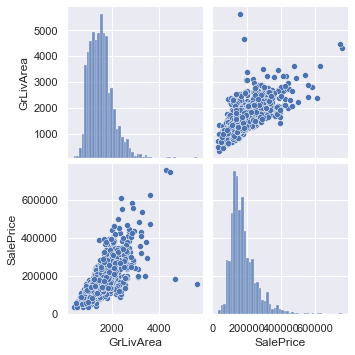

In [3]:
plot_data = pd.DataFrame(houseData)[['GrLivArea', 'SalePrice']]
plot_data.head()

# draw the plot
sb.pairplot(data = plot_data)

# todo: select a better plot type and params

### b) Print the correlation coefficient between these two variables to get a numerical evidence of the relationship.

In [36]:
plot_data.corr() 

,GrLivArea,SalePrice
GrLivArea,1.000000,0.708624
SalePrice,0.708624,1.000000


### c) Import Linear Regression model from Scikit-Learn

In [5]:
from sklearn.linear_model import LinearRegression

### d) Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows).

In [6]:
train_data = houseData[:1100] # first  1100 rows
test_data = houseData[-360:] # last 360 rows

### e) Training : Fit a Linear Regression model on the Train Dataset to predict or estimate SalePrice using GrLivArea.

In [7]:
grLivArea_train = pd.DataFrame(train_data['GrLivArea'])
salePrice_train = pd.DataFrame(train_data['SalePrice'])

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(grLivArea_train, salePrice_train)

print("lin reg model has been trained!")

lin reg model has been trained!


### f) Print the coefficients of the Linear Regression model you just fit, and plot the regression line on a scatterplot.

Intercept 	: b =  [9498.33463562]
Coefficients 	: a =  [[113.88950443]]


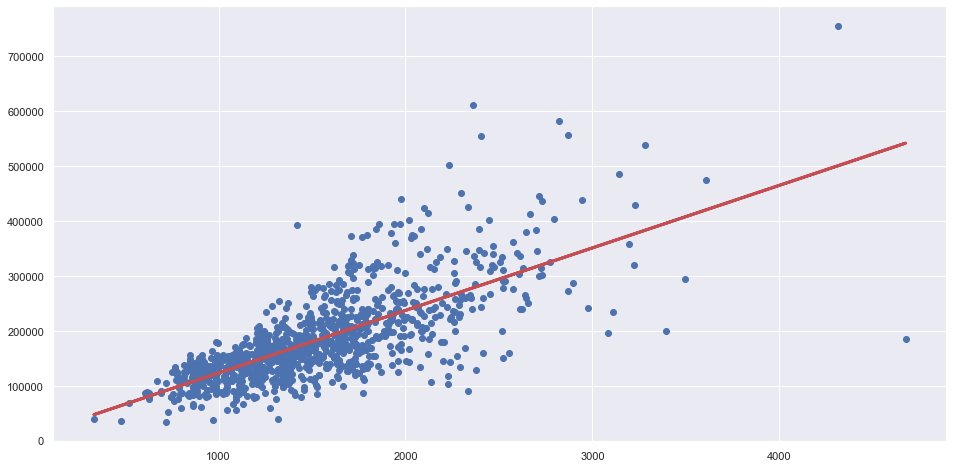

In [8]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression line
regline_x = grLivArea_train
regline_y = linreg.intercept_ + linreg.coef_ * grLivArea_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(grLivArea_train, salePrice_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

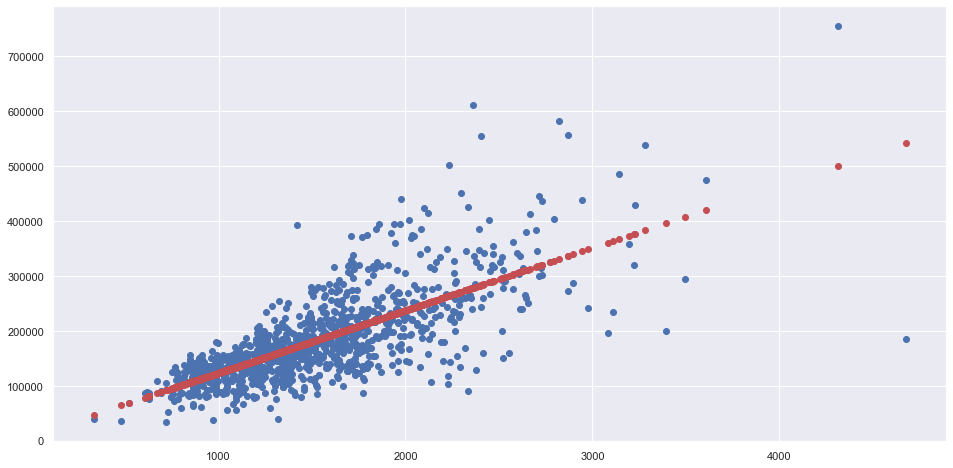

In [9]:
# Predict Total values corresponding to HP Train
salePrice_train_pred = linreg.predict(grLivArea_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(grLivArea_train, salePrice_train)
plt.scatter(grLivArea_train, salePrice_train_pred, color = "r")
plt.show()

### g) Print Explained Variance (R^2) and Mean Squared Error (MSE) on Train Data to check Goodness of Fit of mode

In [10]:
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(grLivArea_train, salePrice_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(salePrice_train, salePrice_train_pred))
print()


Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5317704755454566
Mean Squared Error (MSE) 	: 2962940662.7214036



### h) Predict SalePrice in case of Test Data using the Linear Regression model and the predictor variable GrLivArea.

In [11]:
# define our test columns
grLivArea_test = pd.DataFrame(train_data['GrLivArea'])
salePrice_test = pd.DataFrame(train_data['SalePrice'])


In [12]:
# Predict Total values corresponding to HP Test
salePrice_test_pred = linreg.predict(grLivArea_test)



### i) Plot the predictions on a Scatterplot of GrLivArea and SalePrice in the Test Data to visualize model accuracy

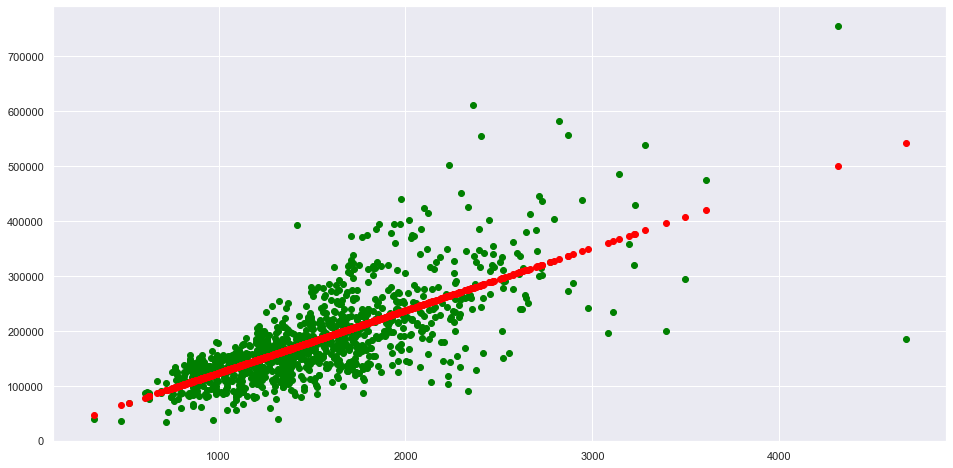

In [13]:
# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(grLivArea_test, salePrice_test, color = "green")
plt.scatter(grLivArea_test, salePrice_test_pred, color = "red")
plt.show()

### j) Print the Mean Squared Error (MSE) on Test Data to check Goodness of Fit of model, compared to the Training

In [14]:
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(grLivArea_test, salePrice_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(salePrice_test, salePrice_test_pred))
print()

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5317704755454566
Mean Squared Error (MSE) 	: 2962940662.7214036



## Problem 2
Perform all the above steps on “SalePrice” against each of the variables “LotArea”, “TotalBsmtSF”, “GarageArea” oneby-one to perform individual Linear Regressions and obtain individual univariate Linear Regression Models in each case.

In [15]:
# using a loop to do the repetitive stuff

In [32]:
selected_x_vars = pd.DataFrame(houseData[['LotArea', 'TotalBsmtSF', 'GarageArea']])
selected_x_vars.describe()
    

,LotArea,TotalBsmtSF,GarageArea
count,1460.000000,1460.000000,1460.000000
mean,10516.828082,1057.429452,472.980137
std,9981.264932,438.705324,213.804841
min,1300.000000,0.000000,0.000000
25%,7553.500000,795.750000,334.500000
50%,9478.500000,991.500000,480.000000
75%,11601.500000,1298.250000,576.000000
max,215245.000000,6110.000000,1418.000000


In [35]:
for column_name in selected_x_vars: 
    # print(column_name)
    column_data = pd.DataFrame(houseData[column_name])
    
    # (a) Plot SalePrice against <column> using any appropriate bivariate plot
    #     to note the strong linear relationship
    
    
    
    # (b) Print the correlation coefficient between these two variables to get 
    #     a numerical evidence of the relationship
    
    # (c) Import Linear Regression model from Scikit-Learn : 
    
    from sklearn.linear_model import LinearRegression
    
    # (d) Partition the dataset houseData into two “random” portions : Train 
    #     Data (1100 rows) and Test Data (360 rows).
    
    # (e) Training : Fit a Linear Regression model on the Train Dataset to 
    #     predict or estimate SalePrice using <column>.
    
    # (f) Print the coefficients of the Linear Regression model you just fit, 
    #     and plot the regression line on a scatterplot
    
    # (g) Print Explained Variance (R^2) and Mean Squared Error (MSE) on Train 
    #     Data to check Goodness of Fit of model.
    
    # (h) Predict SalePrice in case of Test Data using the Linear Regression 
    #     model and the predictor variable GrLivArea.
    
    # (i) Plot the predictions on a Scatterplot of <column> and SalePrice in 
    #     the Test Data to visualize model accuracy.
    
    # (j) Print the Mean Squared Error (MSE) on Test Data to check Goodness of 
    #     Fit of model, compared to the Training
    

## Problem 3
Compare and contrast the four models in terms of Explained Variance (R^2) and Mean Squared Error (MSE) on Train Data,
the accuracy of prediction on Test Data, and comment on which model you think is the best to predict “SalePrice”.

## Bonus Problem